# 1)Importing Libraries

Importing the OS module for changing working Directory.

chdir method in OS module changes the current directory to thedirectory containing data set that I will use for the demo.

PANDAS,NUMPY for data manuplation.
 
Matplotlib,seaborn module for Data Visualisation.    

statsmodels for modelling

In [1]:
import os

data_dir ='C:\\Users\\Keerthi\\Desktop\\Jigsaw\\10 UC-Advance Analytics & Machine Learning\\02-Assignment\\week-3'
os.chdir(data_dir)

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

Within this directory 'data_dir' there is a file called boston.csv                                                              
I will read this file using read_csv method in the PANDAS module and after I have created a PANDAS data frame   
Shape method in pandas module helps in knowing the number of rows ans coulmns present in the data  
I will take a look at the columns,dtypes of this data set       

# 2) Reading Dataset


In [2]:
titanic = pd.read_csv('titanic.csv')
print('Shape of the Dataset-->',titanic.shape)
print('dtypes of the Dataset-->',titanic.dtypes)

titanic.head()



Shape of the Dataset--> (891, 12)
dtypes of the Dataset--> PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data set consists of 12 attributes mixed of Qualitative(categorical) and Quantitative(numeric).

Qualitative Attributes: PassengerId, Survived, Pclass,Name, Sex, Ticket, Cabin & Embarked.

Quantitative Attributes: SlibSp, Parch & Fare

# 3)Data preprocessing of Training Dataset
 For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.We will have to check for the following                                                                                      (i) Missing values                                                                                                                 (ii) Outliers

### checking all the attributes for missing values.

In [3]:
print(titanic.isnull().sum() )

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


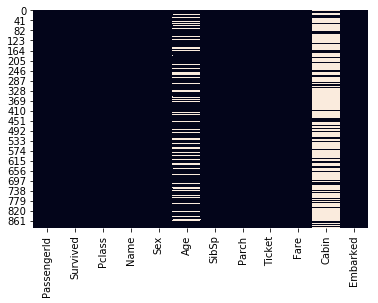

In [4]:
sns.heatmap(titanic.isnull(), cbar=False)

It is clear that Age, Cabin and Embarked are the only attributes where we have missing values.



Embarked attribute is having missing values, best way to fill this would be by most occurred value. In this data set most occurred value for Embarked attribute is ‘S’.


Age is also a numeric attribute and having missing values. Filling the missing values in age attribute is tricky one. We are generating random numbers between (mean — std) and (mean + std) and filling the same. We categorized age into 5 range.




#### Impute Missing Values

In [5]:
#Cabin
titanic['Cabin'].fillna(titanic['Cabin'].mode()[0], inplace = True)


In [6]:
#Embarked
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)


In [7]:
#Age
titanic['Age'].fillna(titanic['Age'].median(), inplace = True)


C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


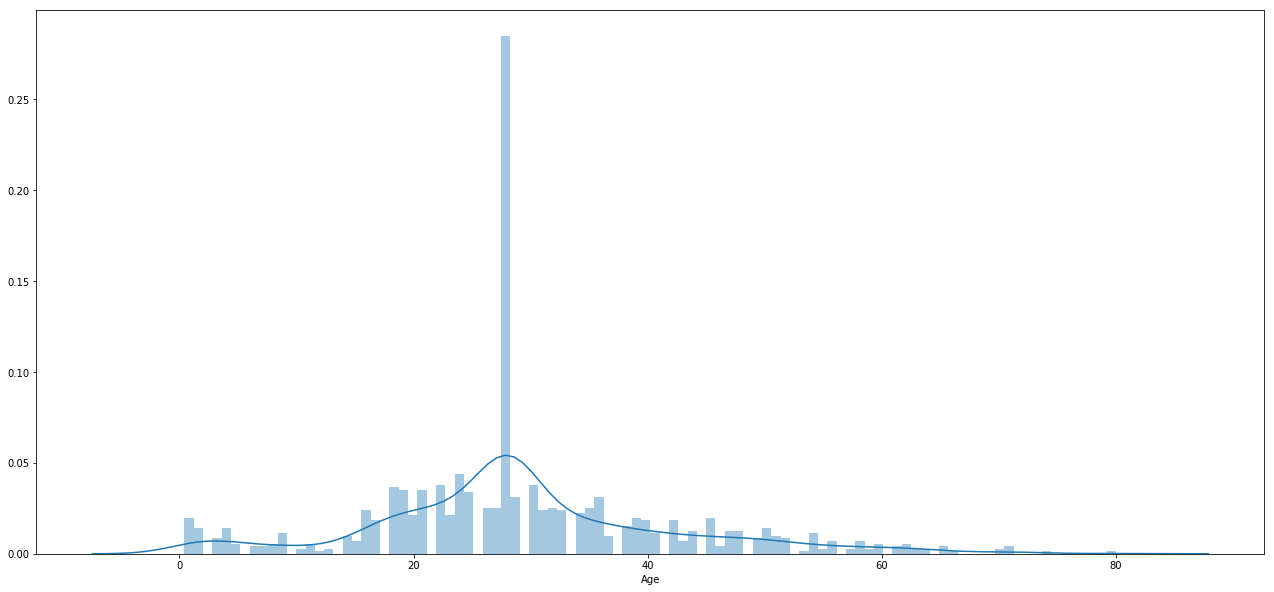

In [8]:
## Let's look at the histogram after missing value imputation
plt.subplots(figsize = (22,10),)
sns.distplot(titanic.Age, bins = 100, kde = True, rug = False, norm_hist=False);

### Outliers

### Plot of Independent Numerical variable

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


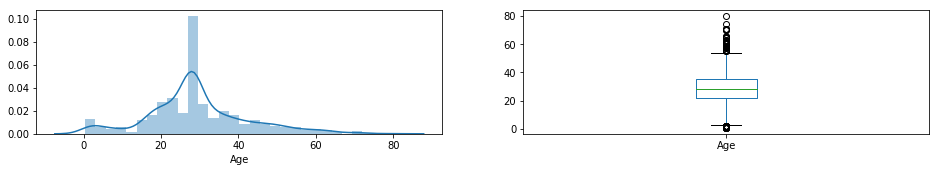

In [9]:
plt.figure(2)
plt.subplot(221)
df = titanic.dropna()
sns.distplot(df['Age']);
plt.subplot(222)
df['Age'].plot.box(figsize = (16,5))
plt.show()

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


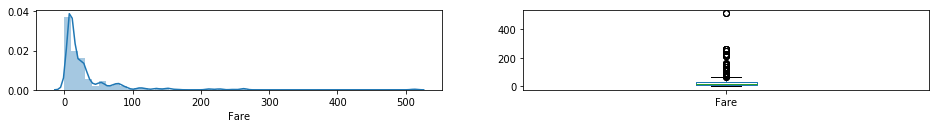

In [10]:
plt.figure(3)
plt.subplot(321)
sns.distplot(titanic['Fare']);
plt.subplot(322)
titanic['Fare'].plot.box(figsize=(16,5))
plt.show()

### (b) Summary Statistics


summary statistics can be created for pandas dataframe using describe method 

In [11]:
print(titanic.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [12]:
# Overview(Survived vs non survied)
survived_summary = titanic.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.028233,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.291433,0.473684,0.464912,48.395408


### (c)Exploratory Data Analysis


### Lets check each attribute one by one and take it’s impact on  data.

### Bar Plot of Dependent/Target Variable

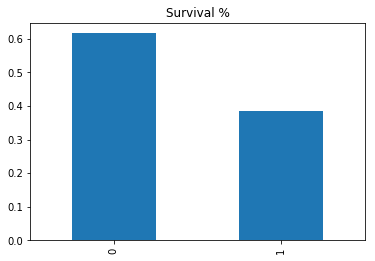

In [13]:
titanic['Survived'].value_counts(normalize = True).plot.bar(title = "Survival %")

### Bi-Variate Analysis between each feature and target variable

##### Pclass

In [14]:
P_Class=pd.crosstab(titanic['Pclass'],titanic['Survived'])
print(P_Class)
print(titanic[['Pclass','Survived']].groupby(['Pclass']).mean())

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


Pclass is numeric attribute and it does not have any missing value, lets check it’s impact on target attribute.

Here we have taken mean, this data represents that Pclass=1 survival rate is 62.96%.

##### SEX

In [15]:
Sex=pd.crosstab(titanic['Sex'],titanic['Survived'])
print(Sex)
print(titanic[['Sex','Survived']].groupby(['Sex']).mean())

Survived    0    1
Sex               
female     81  233
male      468  109
        Survived
Sex             
female  0.742038
male    0.188908


Sex attribute is categorical attribute having values male or female and does not have missing values.



Females are more secure, Female survival rate is more than male.



##### SibSp

In [16]:
Siblings=pd.crosstab(titanic['SibSp'],titanic['Survived'])
print(Siblings)
print(titanic[['SibSp','Survived']].groupby(['SibSp']).mean())

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


SibSp is a numerical attribute represents the siblings/spouse.



##### Parch

In [17]:
Parents=pd.crosstab(titanic['Parch'],titanic['Survived'])
print(Parents)
print(titanic[['Parch','Survived']].groupby(['Parch']).mean())

Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


Parch is also numerical attribute represents the children/parents.



##### Embarked

In [18]:
Embarked=pd.crosstab(titanic['Embarked'],titanic['Survived'])
print(titanic[['Embarked','Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


Embarked attribute is having missing values, best way to fill this would be by most occurred value. In this data set most occurred value for Embarked attribute is ‘S’.

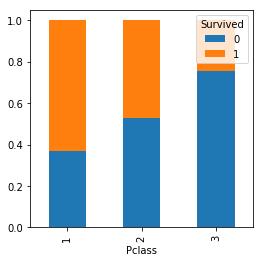

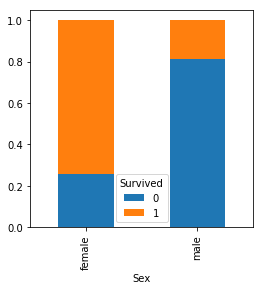

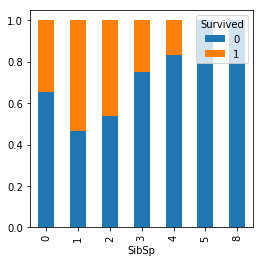

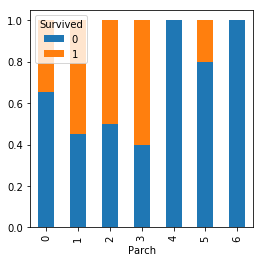

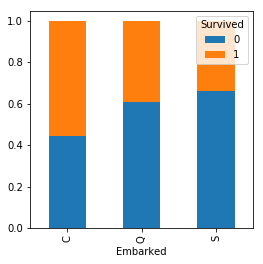

In [19]:
 
P_Class.div(P_Class.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Sex.div(Sex.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Siblings.div(Siblings.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Parents.div(Parents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Embarked.div(Embarked.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 

1. Survival rate was high for Passengers travelling in 1st and 2nd Class
2. Female passengers had a higher survival rate
3. Passengers travelling with 1 or 2 siblings/spouse had a higher survival rate
4. Passengers travelling with 3 parents/children had a higher survival rate
5. Passengers who boarded from Cherbourg survived more
From point 3 and 4, it can be inferred that, passengers who were travelling as family with parents/children/spouse/sibilings had a higher survival rate compared to that of lone passengers.


From point 3 and 4, it can be inferred that, passengers who were travelling as family with parents/children/spouse/sibilings had a higher survival rate compared to that of lone passengers

#### PassengerId

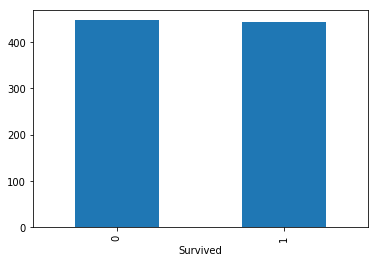

In [20]:
titanic.groupby('Survived')['PassengerId'].mean().plot.bar()
plt.show()

Passenger Id doesnot seem to have much impact on survival



##### Age Category

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


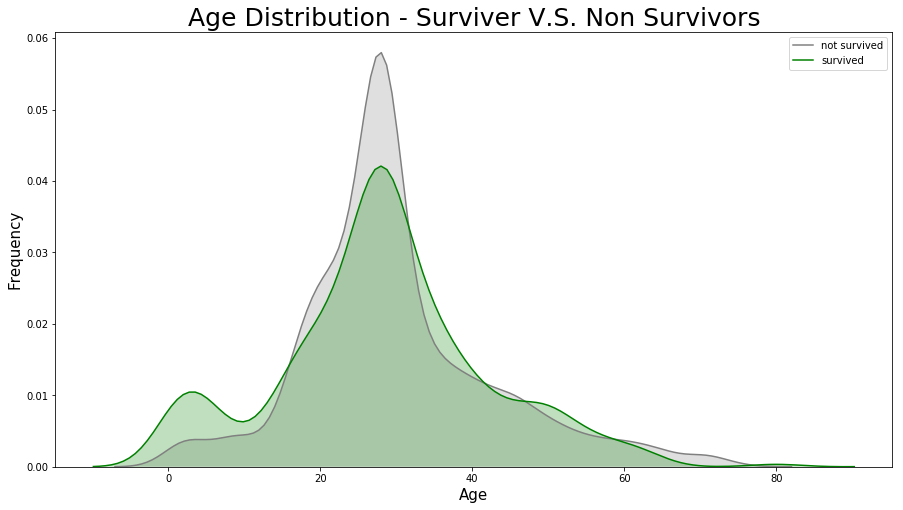

In [21]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

Passengers from Age 0-60 had a higher survial rate. Mostly childrens and teenage, therefore, a good chunk of infant/children were saved.





#### Fare category 

C:\Users\Keerthi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Fare')

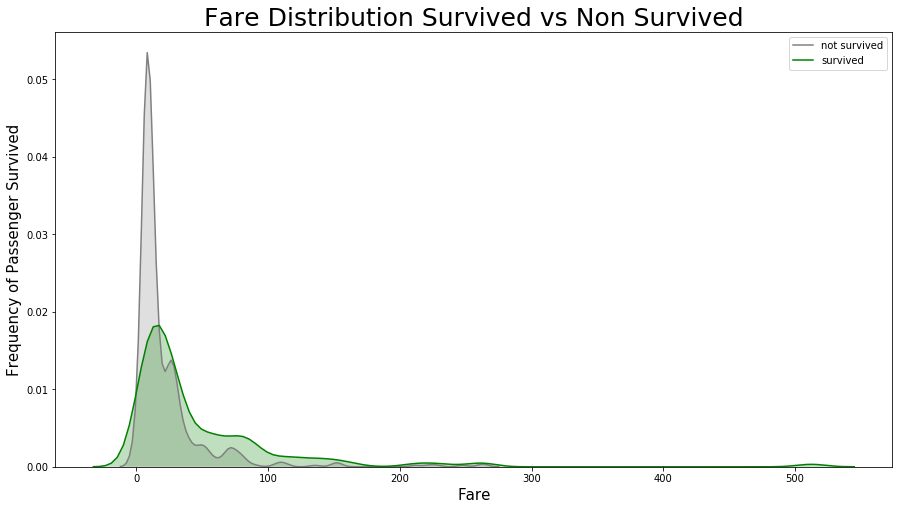

In [22]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 0),'Fare'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(titanic.loc[(titanic['Survived'] == 1),'Fare'] , color='g',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

#### Observations

The spike in the plot under 100 dollar represents that a lot of passengers who bought the ticket within that range did not survive.
When fare is approximately more than 280 dollars, there is no gray shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment.


### Heat Map to find Co-relation with numerial features and target variable



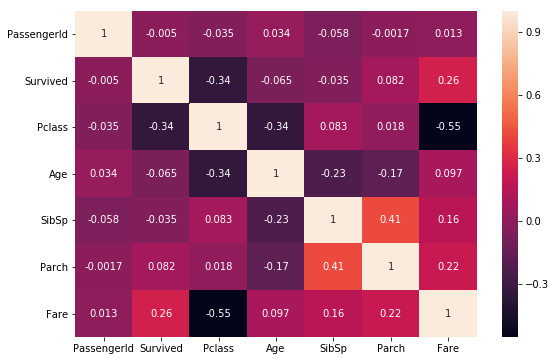

In [23]:
matrix = titanic.corr() 
fax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(data=matrix, annot=True)
#sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

Positive Correlation Features:
Fare and Survived: 0.26
Negative Correlation Features:
Fare and Pclass: -0.6
Sex and Survived: -0.55
Pclass and Survived: -0.33

SibSp and Parch are highly co-related as both indicates family members and its count

Fare and Survived are more co-related compared to other predictors


# 4) Dropping the columns which has no impact from titanic
Form the above analysis , the no impact Columns to be dropped :'PassengerId' , 'Name' , 'Cabin' , 'Ticket' ,'Embarked'

In [24]:
titanic=titanic.drop(['PassengerId' , 'Name' , 'Cabin' , 'Ticket','Embarked'],axis=1)


# 5)Data Cleaning and Scaling 

## Weigth of Evidence (WoE)

The advantages of WOE transformation are

Handles missing values

Handles outliers

The transformation is based on logarithmic value of distributions. This is aligned with the logistic regression output function

No need for dummy variables

By using proper binning technique, it can establish monotonic relationship (either increase or decrease) between the independent and dependent variable

In [25]:
# Calculate information value
def calc_iv(df, feature, target, pr=0):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good 
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad 

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr == 1:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

# Calculating WoE -Categorical Variable

In [26]:
iv_Sex, data_Sex = calc_iv(titanic, 'Sex', 'Survived')
iv_Pclass, data_Pclass = calc_iv(titanic, 'Pclass', 'Survived')



#  Binning of Continious Variables & Calculating WoE 

In [27]:
#binning SibSp
def func(x):
    if  0 <= x <= 1:
        return 1
    elif 2 <= x <= 3 :
        return 2
    elif 4 <= x <=8 :
        return 3
    
titanic['SibSp_bin'] = titanic['SibSp'].apply(func)
iv_SibSp, data_SibSp = calc_iv(titanic, 'SibSp_bin', 'Survived')
print(data_SibSp)

    Variable  Value  All  Good  Bad     Share  Bad Rate  Distribution Good  \
0  SibSp_bin      1  817   495  322  0.916947  0.394125           0.901639   
1  SibSp_bin      2   44    27   17  0.049383  0.386364           0.049180   
2  SibSp_bin      3   30    27    3  0.033670  0.100000           0.049180   

   Distribution Bad       WoE        IV  
0          0.941520  0.043281  0.001726  
1          0.049708  0.010664  0.000006  
2          0.008772 -1.723937  0.069662  


In [28]:
#binning Fare
def func(x):
    if x <= 50:
        return 1
    elif  x <= 250 :
        return 2
    elif x <=1000 :
        return 3
    else:
        return 'NULL'

titanic['Fare_bin'] = titanic['Fare'].apply(func)

iv_Fare, data_Fare = calc_iv(titanic, 'Fare_bin', 'Survived')
print(data_Fare)  



   Variable  Value  All  Good  Bad     Share  Bad Rate  Distribution Good  \
0  Fare_bin      1  731   498  233  0.820426  0.318741           0.907104   
1  Fare_bin      2  151    49  102  0.169473  0.675497           0.089253   
2  Fare_bin      3    9     2    7  0.010101  0.777778           0.003643   

   Distribution Bad       WoE        IV  
0          0.681287 -0.286274  0.064646  
1          0.298246  1.206440  0.252137  
2          0.020468  1.726051  0.029041  


In [29]:
#binning Age
def func(x):
    if x <= 5:
        return 1
    elif  x <= 8 :
        return 2
    elif x <=15 :
        return 3
    elif x <=80 :
        return 4
    else:
        return 5

titanic['Age_bin'] = titanic['Age'].apply(func)

iv_Age, data_Age = calc_iv(titanic, 'Age_bin', 'Survived')
print(data_Age)  



  Variable  Value  All  Good  Bad     Share  Bad Rate  Distribution Good  \
0  Age_bin      1   44    13   31  0.049383  0.704545           0.023679   
1  Age_bin      2   10     5    5  0.011223  0.500000           0.009107   
2  Age_bin      3   29    16   13  0.032548  0.448276           0.029144   
3  Age_bin      4  808   515  293  0.906846  0.362624           0.938069   

   Distribution Bad       WoE        IV  
0          0.090643  1.342326  0.089887  
1          0.014620  0.473288  0.002609  
2          0.038012  0.265648  0.002356  
3          0.856725 -0.090707  0.007378  


In [30]:
#binning Parch
def func(x):
    if x <= 3:
        return 1
    elif  x <= 6 :
        return 2
    else:
        return 3

titanic['Parch_bin'] = titanic['Parch'].apply(func)

iv_Parch, data_Parch = calc_iv(titanic, 'Parch_bin', 'Survived')
print(data_Parch)  



    Variable  Value  All  Good  Bad     Share  Bad Rate  Distribution Good  \
0  Parch_bin      1  881   540  341  0.988777   0.38706           0.983607   
1  Parch_bin      2   10     9    1  0.011223   0.10000           0.016393   

   Distribution Bad       WoE        IV  
0          0.997076  0.013601  0.000183  
1          0.002924 -1.723937  0.023221  


# Information Value (IV)

In [31]:
IV_values = [('Pclass',iv_Pclass),
             ('Sex',iv_Sex),
             ('Age',iv_Age),
             ('SibSp',iv_SibSp),
             ('Parch',iv_Parch),       
            ('Fare',iv_Fare),
             ]


IV_Values = pd.DataFrame(IV_values) 


IV_Values = pd.DataFrame(IV_values, columns = ['Predictor' , 'IV_Values'])
IV_Values

,Predictor,IV_Values
0,Pclass,0.500950
1,Sex,1.341681
2,Age,0.102230
3,SibSp,0.071393
4,Parch,0.023404
5,Fare,0.345823


#### Observations

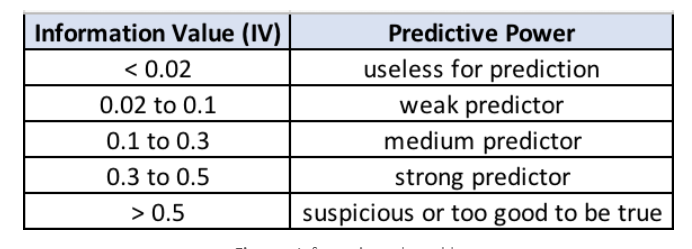
We can say from above IV values that 
                        
    Pclass	  0.50095    --> Strong Predictor 
    Sex	      1.341681   --> very Strong Predictor
    Age	      0.102244    --> Medium Predictor
    SibSp	  0.071393   --> uesless for Prediction
    Parch	  0.023404   --> Weak Predictor
    Fare	  0.345823   --> Strong Predictor 
    


# Mapping WoE values to the predictors 

In [32]:
Embarked_map = data_Sex.set_index('Value')['WoE'].to_dict()
titanic['Sex_WoE']=titanic['Sex'].map(Embarked_map)

Embarked_map = data_Pclass.set_index('Value')['WoE'].to_dict()
titanic['Pclass_WoE']=titanic['Pclass'].map(Embarked_map)

Embarked_map = data_Age.set_index('Value')['WoE'].to_dict()
titanic['Age_WoE']=titanic['Age_bin'].map(Embarked_map)

Embarked_map = data_SibSp.set_index('Value')['WoE'].to_dict()
titanic['SibSp_WoE']=titanic['SibSp_bin'].map(Embarked_map)

Embarked_map = data_Parch.set_index('Value')['WoE'].to_dict()
titanic['Parch_WoE']=titanic['Parch_bin'].map(Embarked_map)

Embarked_map = data_Fare.set_index('Value')['WoE'].to_dict()
titanic['Fare_WoE']=titanic['Fare_bin'].map(Embarked_map)



# 6)Creating a new dataset titanic_woe from the Weight of Evidence values

In [33]:
titanic_woe = titanic[['Survived','Pclass_WoE','Sex_WoE','Age_WoE','SibSp_WoE','Parch_WoE','Fare_WoE']]

In [34]:
print(titanic_woe.head())


   Survived  Pclass_WoE   Sex_WoE   Age_WoE  SibSp_WoE  Parch_WoE  Fare_WoE
0         0   -0.666483 -0.983833 -0.090707   0.043281   0.013601 -0.286274
1         1    1.003916  1.529877 -0.090707   0.043281   0.013601  1.206440
2         1   -0.666483  1.529877 -0.090707   0.043281   0.013601 -0.286274
3         1    1.003916  1.529877 -0.090707   0.043281   0.013601  1.206440
4         0   -0.666483 -0.983833 -0.090707   0.043281   0.013601 -0.286274


In [35]:
print(titanic_woe.isnull().sum() )

Survived      0
Pclass_WoE    0
Sex_WoE       0
Age_WoE       0
SibSp_WoE     0
Parch_WoE     0
Fare_WoE      0
dtype: int64


# (7)Preparing the data for training the model

### (a)Separating dependent and independent variables¶

 

    X = Remaining other features
    Y = Survived 

In [36]:

predictors=titanic_woe.drop("Survived", axis=1)
response=titanic_woe['Survived']

### (b)Splitting the data into training and testing sets


We can use model_selection from Scikit Learn module to split the dataset into train and test datasets.

In [37]:

from sklearn.model_selection import train_test_split

In [38]:

predictors_train, predictors_test, response_train, response_test = train_test_split(predictors, response, test_size = 0.2,\
                                                                                    random_state=30)
                                                                                    

Within this model selection module, there is a train test split method which helps us in dividing a dataset into training and testing component

test size - it talks about what should be the size of the test dataset relative to the total dataset.
Supplying 0.20 test_size will create a test dataset which is 20% and training dataset of 80% of total dataset

In [39]:
print(predictors_train.shape)
print(response_train.shape)
print(predictors_test.shape)
print(response_test.shape)



(712, 6)
(712,)
(179, 6)
(179,)


# (8)Preparing the training data for Logistic Regression



### (a)Add the constant term to the training data

In [40]:
predictors_train = sm.add_constant(predictors_train)
predictors_test=sm.add_constant(predictors_test)

C:\Users\Keerthi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [41]:
predictors_test.columns

Index(['const', 'Pclass_WoE', 'Sex_WoE', 'Age_WoE', 'SibSp_WoE', 'Parch_WoE',
       'Fare_WoE'],
      dtype='object')

### (b) Apply GLM method & Fit the model

### BACKWARD selection regression

### Building the model on training dataset with all predictors

In [42]:
logit = sm.GLM(response_train, predictors_train, family=sm.families.Binomial())
result = logit.fit()


### Print the Model Summary

print model summary

In [43]:
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -306.54
Date:                Thu, 16 May 2019   Deviance:                       613.08
Time:                        21:44:43   Pearson chi2:                     829.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4721      0.102     -4.627      0.000      -0.672      -0.272
Pclass_WoE     0.9061      0.173      5.223      0.0

In [44]:
print(result.summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            627.0823  
Link Function:      logit            BIC:            -4017.4126
Dependent Variable: Survived         Log-Likelihood: -306.54   
Date:               2019-05-16 21:44 LL-Null:        -473.03   
No. Observations:   712              Deviance:       613.08    
Df Model:           6                Pearson chi2:   829.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -0.4721    0.1020  -4.6265  0.0000  -0.6721  -0.2721
Pclass_WoE   0.9061    0.1735   5.2232  0.0000   0.5661   1.2462
Sex_WoE      1.0820    0.0860  12.5826  0.0000   0.9134   1.2505
Age_WoE      1.6560    0.3512   4.7154  0.0000   

In [45]:
#Deviance
modDev=result.deviance
#Akaike Information Criterion (AIC)
modAIC=result.aic

### Observations

Non-Significant Predictors :

    We can observe that 'Parch_WoE' (P-value=7.4%) is not significant at confindence level of 95% , as they are having P-values more than Significant level of 5%
    The Probability boundaries include zero for predictor Parch_WoE 

    Hence we can conclude that Parch_WoE doesn't play a significant role in predict Survival and can be dropped.




## Removing Predictors which are not significant 

##### Let's now test the model by dropping the Parch_WoE, using other predictors in data to predict Surival.

In [46]:
predictors_train = predictors_train.drop(['Parch_WoE'], axis=1)

In [47]:

logit = sm.GLM(response_train, predictors_train, family=sm.families.Binomial())
result_1 = logit.fit()
print(result_1.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            629.6060  
Link Function:      logit            BIC:            -4019.4570
Dependent Variable: Survived         Log-Likelihood: -308.80   
Date:               2019-05-16 21:44 LL-Null:        -473.03   
No. Observations:   712              Deviance:       617.61    
Df Model:           5                Pearson chi2:   830.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -0.4848    0.1015  -4.7749  0.0000  -0.6838  -0.2858
Pclass_WoE   0.9367    0.1729   5.4169  0.0000   0.5978   1.2756
Sex_WoE      1.0670    0.0852  12.5256  0.0000   0.9001   1.2340
Age_WoE      1.6770    0.3509   4.7785  0.0000   

In [48]:
#Deviance
mod_Dev=result_1.deviance
#Akaike Information Criterion (AIC)
mod_AIC=result_1.aic
#Pesudo-R2
R2=sm.Logit(response_train, predictors_train).fit().prsquared
print('################  INITIAL MODEL ####################')
print('Deviance is            -->',modDev)
print('AIC is                 -->',modAIC)

print('################  FINAL MODEL  ####################')
print('Deviance is            -->',mod_Dev)
print('AIC is                 -->',mod_AIC)
print('Pesudo-R2 score is     -->',R2)

Optimization terminated successfully.
         Current function value: 0.433712
         Iterations 6
################  INITIAL MODEL ####################
Deviance is            --> 613.0822994396209
AIC is                 --> 627.0822994396208
################  FINAL MODEL  ####################
Deviance is            --> 617.6060165988678
AIC is                 --> 629.6060165988678
Pesudo-R2 score is     --> 0.34717882794533717


### Observations

We see that  AIC criterion, which measures the goodness of fit has decreased than earlier as we were being penalized for adding non-useful predictors in our model.
Deviance is lower than the intial model.

        

### Inference from model summary.

                                y=β0+β1x1+β2x2+...+βnxn
    The β coefficeints represents the lod odds of beign survied from titanic ship.
    
                   Predictors    Coefficeints
                   
                   Pclass_WoE    0.9367 
                   Sex_WoE       1.0670   
                   Age_WoE       1.6770   
                   SibSp_WoE     1.3190  
                   Fare_WoE     0.4055
                  

                 
   
    • Pclass_WoE :
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of survival increases. 
          o	 Intuition with sign: 1st class have higher WoE and implies that the model suggest higher survival rates compared to other class
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same.1St class rich guys are saved more compared to 2nd and 3rd class passengers!  

     • Sex_WoE :
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of survival increases. 
          o	 Intuition with sign: Female have higher WoE and implies that the model suggest higher survival rates compared to Males
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same.Not be the discriminant . But it is ! Females are more saved from disaster. 
     
     • Age_WoE :
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of survival increases. 
          o	 Intuition with sign: Age group of (0-5) have higher WoE and implies that the model suggest higher survival rates compared to other Age groups.
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same. Childrens are saved than people lived life !! 
     
     • SibSp_WoE :
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of survival increases. 
          o	 Intuition with sign: The passenger who boarded the ship with no siblings / spouses have higher WoE and implies that the model suggest higher survival rates compared to others. 
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same. Safe to be alone !!        
     • Fare_WoE :
          o	 significance : Significant  as the p-value is <0.5 at confidence level of 95% 
          o	 sign : +ve ,which means that with increase of WoE the chance of survival increases. 
          o	 Intuition with sign: The passenger who boarded the ship with high fare have higher WoE and implies that the model suggest higher survival rates compared to others. 
          o  Crosschecking with data : this is evident in  train sample and the model reflects the same. Rich guys  !! 
          

          

In [49]:
#Exponential of Coefficients -- odds
np.exp(result_1.params)
print(np.exp(result_1.params))

const         0.615801
Pclass_WoE    2.551429
Sex_WoE       2.906745
Age_WoE       5.349626
SibSp_WoE     3.739857
Fare_WoE      1.500048
dtype: float64


In [50]:
#Coefficients - Log of odds
result_1.params
print(result_1.params)

const        -0.484832
Pclass_WoE    0.936654
Sex_WoE       1.067034
Age_WoE       1.677027
SibSp_WoE     1.319047
Fare_WoE      0.405497
dtype: float64


## Using SCIKIT Learn module to fit the model on significant predictors

In [51]:
from sklearn.linear_model import LogisticRegression
logit_sk  = LogisticRegression(fit_intercept = False, C = 1e9)
result_sk=logit_sk.fit(predictors_train, response_train) 
print(list(zip(result_sk.coef_[0], predictors_train)))


[(-0.484829090227068, 'const'), (0.9366730179073914, 'Pclass_WoE'), (1.0670360554605751, 'Sex_WoE'), (1.6772424789926175, 'Age_WoE'), (1.318830767901474, 'SibSp_WoE'), (0.40551179476561927, 'Fare_WoE')]


C:\Users\Keerthi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 9) Validation of the Model

## (a)Preparing the test data for test the Prediction

### (i)Add the constant term to the test data


In [52]:
predictors_test = sm.add_constant(predictors_test)


C:\Users\Keerthi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### (ii)Dropping the predictors which proved to not significant in predicting the Survival rate in Test dataset.

In [53]:
predictors_test = predictors_test.drop(['Parch_WoE'], axis=1)


## (b) Predicting the Survival in Test dataset

#### i)Model Evaluation (Actual Vs Predicted) on test sample -STATS Model 

In [54]:
pred_survival = result_1.predict(predictors_test)
print('Total predicted Survivers in test dataset-->',pred_survival.sum())

Total predicted Survivers in test dataset--> 68.08145232543359


In [82]:
pred_survival_train = result_1.predict(predictors_train)
print('Total predicted Survivers in test dataset-->',pred_survival_train.sum())
pred_survival_train_Sk = result_sk.predict(predictors_train)
pred_survival_train_Sk.sum()

Total predicted Survivers in test dataset--> 271.0000000000764


259

In [56]:
print('Actual Total Survivers in test dataset-->',response_test.sum())
print('Actual Total Survivers in train dataset-->',response_train.sum())

Actual Total Survivers in test dataset--> 71
Actual Total Survivers in train dataset--> 271


###### From these numbers it kind of evident that the model is doing great!

#### ii)Model Evaluation (Actual Vs Predicted) on test sample -  SCIKIT Learn

In [57]:
pred_survival_sk = logit_sk.predict(predictors_test)
pred_survival[:5]

417    0.782089
307    0.922877
87     0.085490
577    0.922877
684    0.197130
dtype: float64

## c) Checking Accuracy Score 

Ø Checking:

    (i)Accuracy score.
    (ii)Error rate 
    (iii)Number of observations predicted Correctly and incorrectly
			
			
			
			


#### (i)Accuracy score -Stats Model

In [58]:
import numpy
import pandas
pred_survival_class = pred_survival.map (lambda x : 1 if x > 0.5 else 0)
predicted_accuracy = sum(pred_survival_class == response_test) / len(response_test)
print('Accuracy score is    -->',predicted_accuracy)
print('Error rate is        -->',1-predicted_accuracy)

Accuracy score is    --> 0.7877094972067039
Error rate is        --> 0.2122905027932961


#### (ii)Accuracy score -SCIKIT learn Model

In [59]:
from sklearn.metrics import accuracy_score
#Accuracy score
acc=accuracy_score(response_test.astype(float), pred_survival_sk)
#Calculate Error rate
err=1-acc
#Calculate number of correctly classified observations.
cor=accuracy_score(response_test.astype(float), pred_survival_sk, normalize=False)
#Calculate number of incorrectly classified observations.
incor=len(response_test) - accuracy_score(response_test, pred_survival_sk, normalize=False)

print('Accuracy score                      -->',acc)
print('Error rate is                       -->',err)
print('correctly classified observations   -->', cor)
print('incorrectly classified observations -->', incor)

Accuracy score                      --> 0.7877094972067039
Error rate is                       --> 0.2122905027932961
correctly classified observations   --> 141
incorrectly classified observations --> 38


### Observations:

The Accuracy score  is almost 80%, which is a good score for a model.

## Calculate log loss


In [60]:
from sklearn.metrics import log_loss
pred_log_loss=log_loss(response_test, pred_survival_sk)
print('log_loss value       -->',pred_log_loss)

log_loss value       --> 7.332325679136812


### Observations

Log Loss quantifies the accuracy of a classifier by penalising false classifications.The lower the value the more better. We can actually compare this with the log loss score using cut off probability to predict the classes.

# 10Calculate Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
confusion = confusion_matrix(response_test, pred_survival_sk)

In [63]:
confusion_matrix = pd.DataFrame(confusion, index=['Actually"not Survived"','Actually "Survived"'], columns=['Predicted "not Survived"','Predicted "Survived"'])

confusion_matrix

,"Predicted ""not Survived""","Predicted ""Survived"""
"Actually""not Survived""",92,16
"Actually ""Survived""",22,49


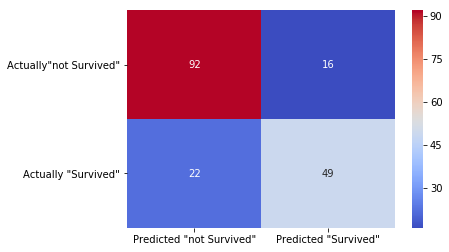

In [64]:
_=sns.heatmap(confusion_matrix, cmap='coolwarm', annot=True)

### Observations

    	True positives  (42): These are the cases when we predicted "survival" when the passenger is actually "survived".
    	True negatives  (95): We predicted "not survived" and the actual value was also “not survived” 
    	False positives (29): We predicted “survival” but the passengers didn’t have survival(true value was “notsurvived”).
    	False negatives (13): We predicted “not survived” but the subjects had "survived" (true value was “survived”).


### Calculate precision and recall scores

In [65]:
from sklearn.metrics import precision_score, recall_score

In [66]:
prec = precision_score(response_test, pred_survival_sk)
rec = recall_score(response_test, pred_survival_sk)
print('precision_score     -->',prec)
print('recall_score        -->',rec)

precision_score     --> 0.7538461538461538
recall_score        --> 0.6901408450704225


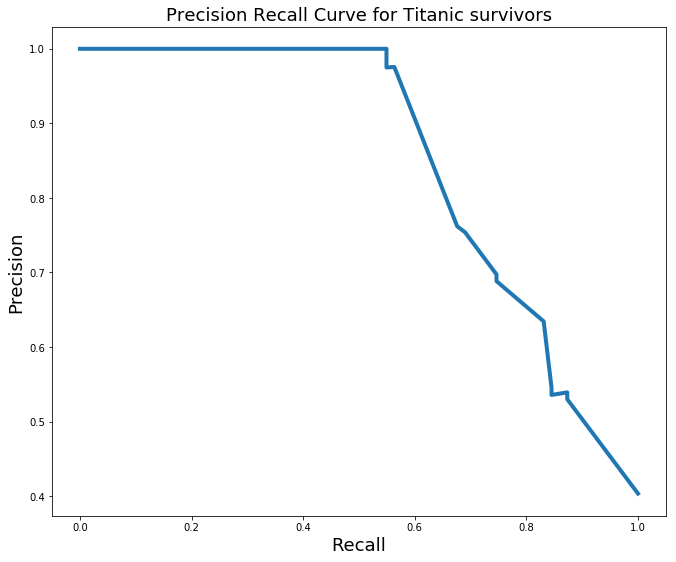

In [67]:
from sklearn.metrics import precision_recall_curve

y_score = logit_sk.decision_function(predictors_test)

precision, recall, _ = precision_recall_curve(response_test, y_score)
plt.figure(figsize=[11,9])
plt.plot(recall, precision, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.show()

### Calculate F1 Score

In [68]:
from sklearn.metrics import f1_score
f=f1_score(response_test, pred_survival_sk)
print('f1_score        -->',f)

f1_score        --> 0.7205882352941175


### Observations

The high value of F1score is evident that the performance of model will be good

# (11) Calculate Area under the ROC curve

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

### Calculate the probablities

Let's take probablities from our classifier, instead of classes.

In [70]:
probability = logit_sk.predict_proba(predictors_test)[::,1]

In [71]:

area_UnderCurve = roc_auc_score(response_test, probability)
print('Area Under Curve is --> ',area_UnderCurve)

Area Under Curve is -->  0.8435706833594158


In [72]:
fpr, tpr, threshold = roc_curve(response_test, probability)

### Plotting the ROC curve

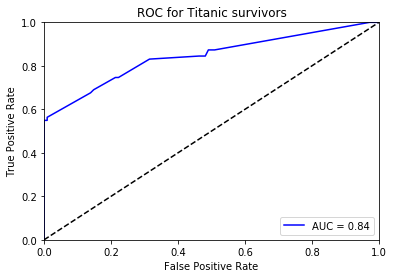

In [73]:

plt.title('ROC for Titanic survivors')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % area_UnderCurve)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observations

    The higher the area under the curve the more it tells how good the classification model is at distinguishing between two classes of cases.
                                   
     AUC refers to area under ROC curve. ROC stands for Receiver Operating Characteristic
                                        

We can also calculate the optimal threshold probability from this ROC curve.

In [74]:

optimal_index = np.argmax(tpr - fpr)
optimal_cutoff = threshold[optimal_index]

In [75]:
print('optimal_cutoff is --> ',optimal_cutoff) 

optimal_cutoff is -->  0.5981085663699236


##### Update model based on optimal probability threshold



Let's use this new optimal threshold and update our predictions

In [76]:
new_pred_survival = np.where(probability > optimal_cutoff, 1, 0)

print('new_pred_survival is --> ',new_pred_survival)

new_pred_survival is -->  [1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0]


In [77]:
from sklearn.metrics import confusion_matrix
new_confusion = confusion_matrix (response_test, new_pred_survival)

In [78]:

new_confusion_matrix = pd.DataFrame(new_confusion, index=['Actually"not Survived"','Actually "Survived"'], columns=['Predicted "not Survived"','Predicted "Survived"'])

new_confusion_matrix


,"Predicted ""not Survived""","Predicted ""Survived"""
"Actually""not Survived""",107,1
"Actually ""Survived""",32,39


### Observations

We see that prediction power of the model has increased with the optimal cutoff probability value

##### Calculate the updated accuracy score and log loss metrics.

In [79]:
optimal_accuracy_score = accuracy_score(response_test, new_pred_survival)
optimal_log_loss = log_loss(response_test, new_pred_survival)
print('Actual_accuracy_score -->',predicted_accuracy)
print('optimal_accuracy_score is --> ',optimal_accuracy_score)

print('Actual_log_loss -->',pred_log_loss)
print('optimal_log_loss is --> ',optimal_log_loss)



Actual_accuracy_score --> 0.7877094972067039
optimal_accuracy_score is -->  0.8156424581005587
Actual_log_loss --> 7.332325679136812
optimal_log_loss is -->  6.367488383404932


### Observations

We see that the log_loss is decreased and the accuracy of the prediction has increased when optimal cut off value of optimal cutoff probability